In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#fetching score data from the csv file. 
data = "scoreData.csv"
scoreData = pd.read_csv(data)
scoreData

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


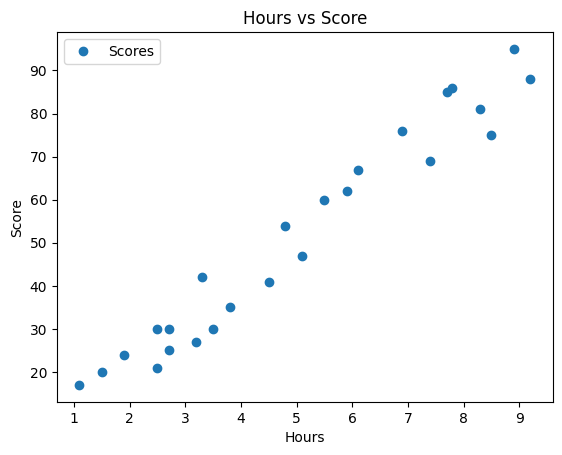

In [4]:
scoreData.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

In [15]:
#Selects all rows and all columns except the last one from the DataFrame 
#[:,:] = [rows , columns]
X = scoreData.iloc[:, :1].values 

#selects all rows from the second column of the DataFrame
y = scoreData.iloc[:, 1].values 


In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [17]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression()

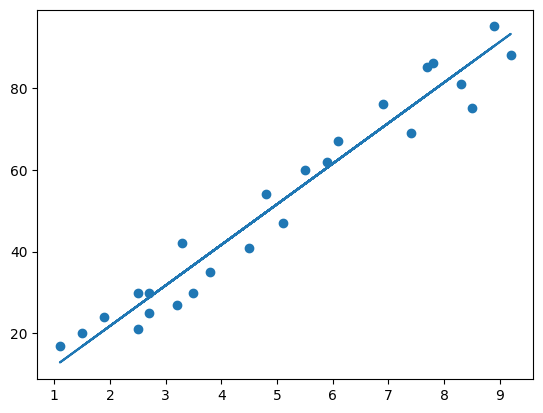

In [18]:
# Plotting the regression line
line =  lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [19]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
hours = 9.25
own_pred = lr.predict(np.array([hours]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737539


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
